# Explore the datasets

In [1]:
from src.utils import load_dataset

dataframe = load_dataset()
dataframe.head(10)

,Song,Artist,Length,Genre,Datetime,Star_Rating,User_Name
0,Song254,The Shins,142.0,Indie,2023-07-23 07:42:08.095267,4,Alice
1,Song54,Arcade Fire,218.0,Indie,2023-07-13 17:12:08.095267,3,Alice
2,Song153,Moby,133.0,Techno,2023-07-30 11:00:08.095267,5,Alice
3,Song124,Vampire Weekend,135.0,Indie,2023-07-22 18:23:08.095267,3,Alice
4,Song194,The Shins,172.0,Indie,2023-07-19 21:21:08.095267,3,Alice
5,Song123,Carl Cox,352.0,Techno,2023-08-03 11:01:08.095267,2,Alice
6,Song114,Death Cab for Cutie,265.0,Indie,2023-07-10 04:32:08.095267,3,Alice
7,Song123,Carl Cox,352.0,Techno,2023-07-22 04:21:08.095267,3,Alice
8,Song167,Dolly Parton,154.0,Country,2023-07-07 23:27:08.095267,5,Alice
9,Song194,The Shins,172.0,Indie,2023-07-06 05:17:08.095267,4,Alice


**0. Describe**


In [58]:
final_data.describe(include="all")

C:\Users\User\AppData\Local\Temp\ipykernel_19224\2843862053.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_data.describe(include="all")


,Song,Artist,Length,Genre,Datetime,Star_Rating,User_Name,date
count,1314,1314,1314.000000,1314,1314,1314.000000,1314,1314
unique,281,60,NaN,10,1311,NaN,20,32
top,Song166,Stevie Ray Vaughan,NaN,Rock,2023-07-13 21:08:08.116174,NaN,Karen,2023-08-02
freq,14,71,NaN,213,2,NaN,97,53
first,NaN,NaN,NaN,NaN,2023-07-04 16:00:08.126178,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2023-08-04 15:27:08.125192,NaN,NaN,NaN
mean,NaN,NaN,3.847210,NaN,NaN,4.075342,NaN,NaN
std,NaN,NaN,1.177274,NaN,NaN,1.077903,NaN,NaN
min,NaN,NaN,2.016667,NaN,NaN,2.000000,NaN,NaN
25%,NaN,NaN,2.716667,NaN,NaN,3.000000,NaN,NaN


1. **Genre Songs and Listenings**



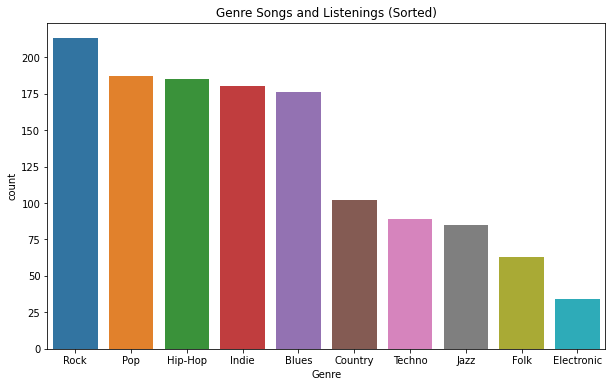

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
order = dataframe['Genre'].value_counts().index
sns.countplot(data=dataframe, x='Genre', palette='tab10', order=order)
plt.title('Genre Songs and Listenings (Sorted)')
plt.show()

2. **Minutes Listened in Total per Day (Per Genre)**


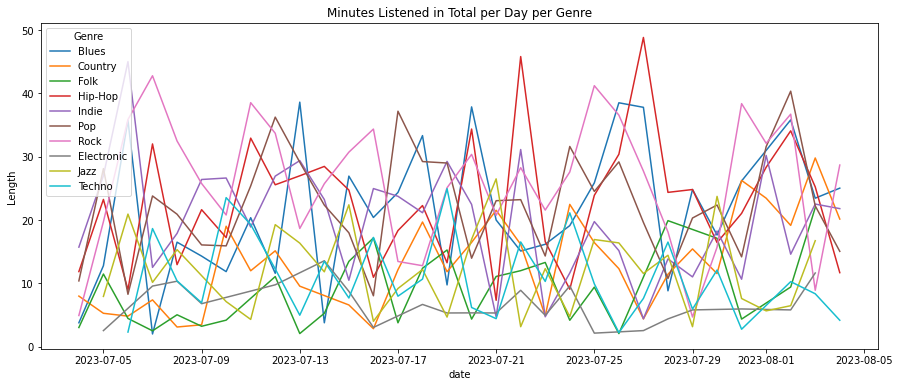

In [51]:
dataframe['Datetime'] = pd.to_datetime(dataframe['Datetime'])
dataframe['date'] = dataframe['Datetime'].dt.date
dataframe['Length'] = dataframe['Length'] / 60
daily_minutes_genre = dataframe.groupby(['date', 'Genre'])['Length'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_minutes_genre, x='date', y='Length', hue='Genre', palette='tab10')
plt.title('Minutes Listened in Total per Day per Genre')
plt.show()



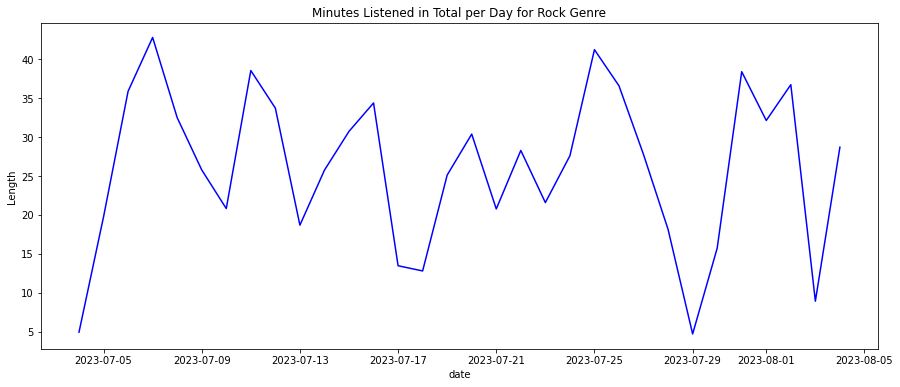

In [53]:
genre = 'Rock'

# Plot for only Rock genre
daily_minutes_rock = daily_minutes_genre[daily_minutes_genre['Genre'] == genre]
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_minutes_rock, x='date', y='Length', color='blue')
plt.title('Minutes Listened in Total per Day for Rock Genre')
plt.show()


4. **Top 10 Most Listened Songs**


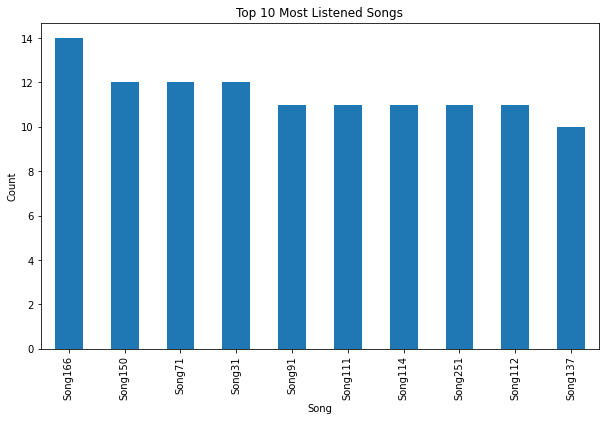

In [26]:
top_songs = dataframe['Song'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_songs.plot(kind='bar')
plt.title('Top 10 Most Listened Songs')
plt.xlabel('Song')
plt.ylabel('Count')
plt.show()


**Top 10 most listened artists**

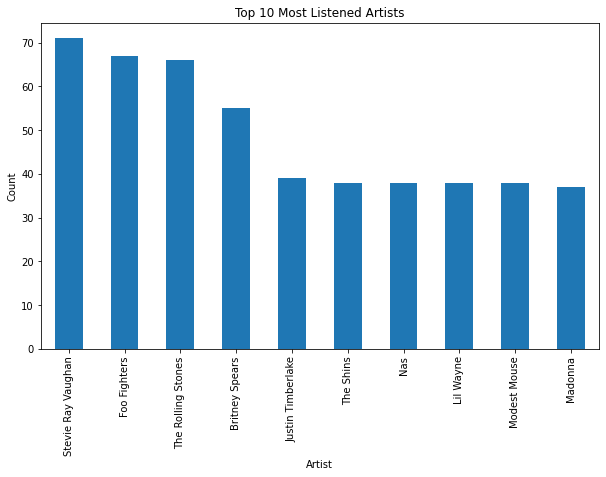

In [28]:
top_artists = dataframe['Artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Most Listened Artists')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()



**Song length**

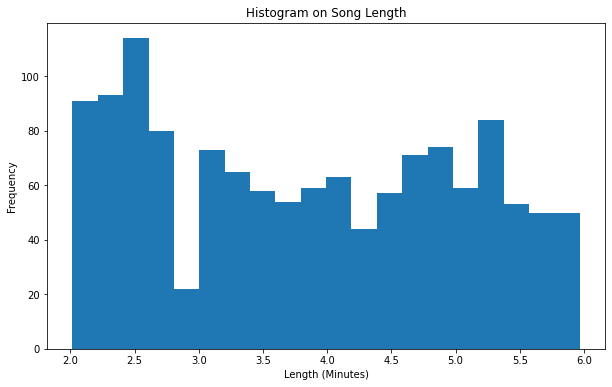

In [30]:
plt.figure(figsize=(10, 6))
dataframe['Length'].plot(kind='hist', bins=20)
plt.title('Histogram on Song Length')
plt.xlabel('Length (Minutes)')
plt.show()



**Minutes listened per day and per user**

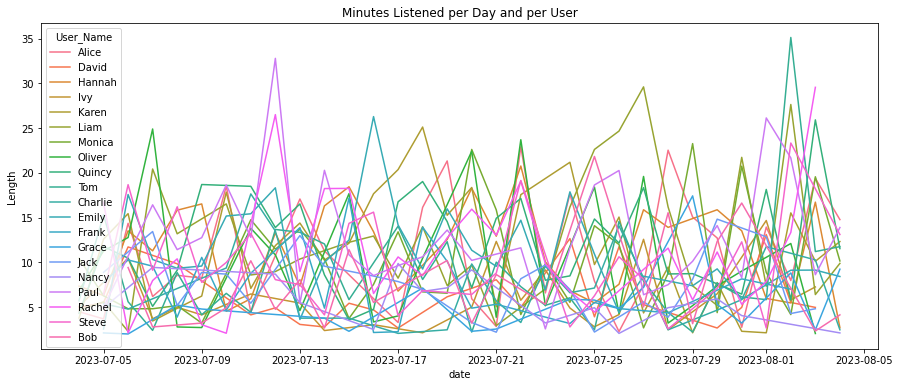

In [40]:
daily_minutes_user = dataframe.groupby(['date', 'User_Name'])['Length'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_minutes_user, x='date', y='Length', hue='User_Name')
plt.title('Minutes Listened per Day and per User')
plt.show()



**total minutes per user**

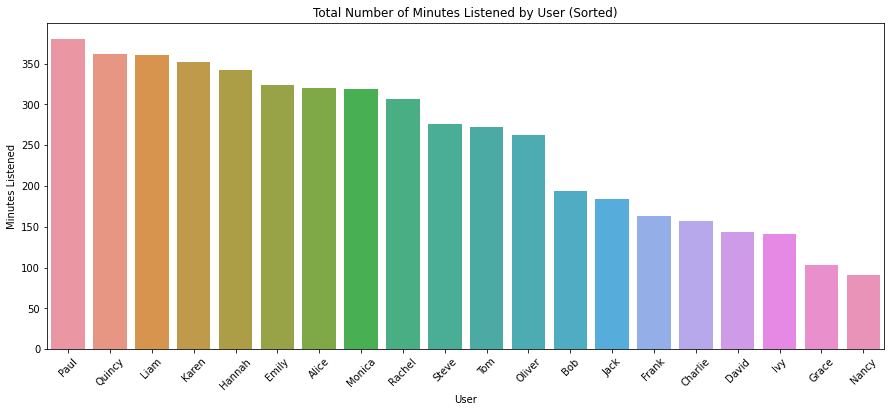

In [46]:
# Summing the total listening minutes for each user
total_minutes_user = dataframe.groupby('User_Name')['Length'].sum().reset_index()

# Sorting the users by the total minutes listened
total_minutes_user_sorted = total_minutes_user.sort_values('Length', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(data=total_minutes_user_sorted, x='User_Name', y='Length')
plt.title('Total Number of Minutes Listened by User (Sorted)')
plt.xlabel('User')
plt.ylabel('Minutes Listened')
plt.xticks(rotation=45)
plt.show()